In [1]:
import numpy as np
import pandas as pd
pd.options.display.max_rows = 200
pd.options.display.max_columns = 1000
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [2]:
df = pd.read_csv('/Users/morton/Dicom Files/RADSARC_R/XNAT/extractions/extractions__20220908_2311_minusCalcificationMasks/radiomicFeatures/radiomicFeatures.csv')
df.drop(list(df.filter(regex = 'source')), axis = 1, inplace = True)
df.drop(list(df.filter(regex = 'diagnostic')), axis = 1, inplace = True)
groupStr = 'lesion_calcificationDeleted_original_'
df = df.filter(regex = groupStr + '|StudyPatientName')
df.rename(lambda x:x.replace(groupStr,''), axis=1, inplace=True)

In [3]:
logFeatures = ['shape_MeshVolume', 'shape_SurfaceArea', 'shape_SurfaceVolumeRatio', 'shape_VoxelVolume', 
               'firstorder_Energy', 'firstorder_TotalEnergy', 'firstorder_Variance']
for feat in logFeatures:
    df.loc[:,feat + '_log10'] = np.log10(df[feat])
    df.drop(feat, axis=1, inplace=True)

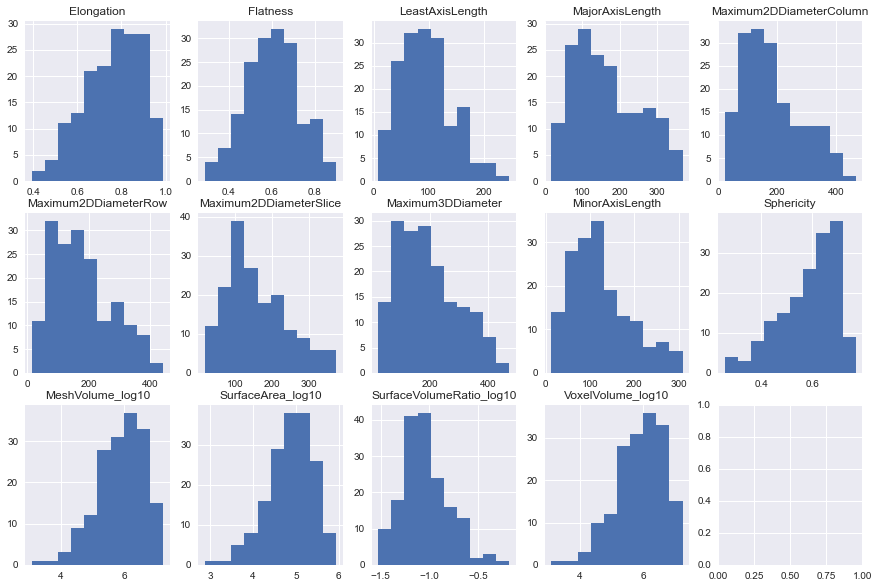

In [4]:
f,a = plt.subplots(3,5, figsize=(15,10))
a = a.ravel()
for n, col in enumerate(df.filter(regex = 'shape', axis = 1).columns):
    a[n].hist(df[col])
    a[n].set_title(col.replace('shape_',''))

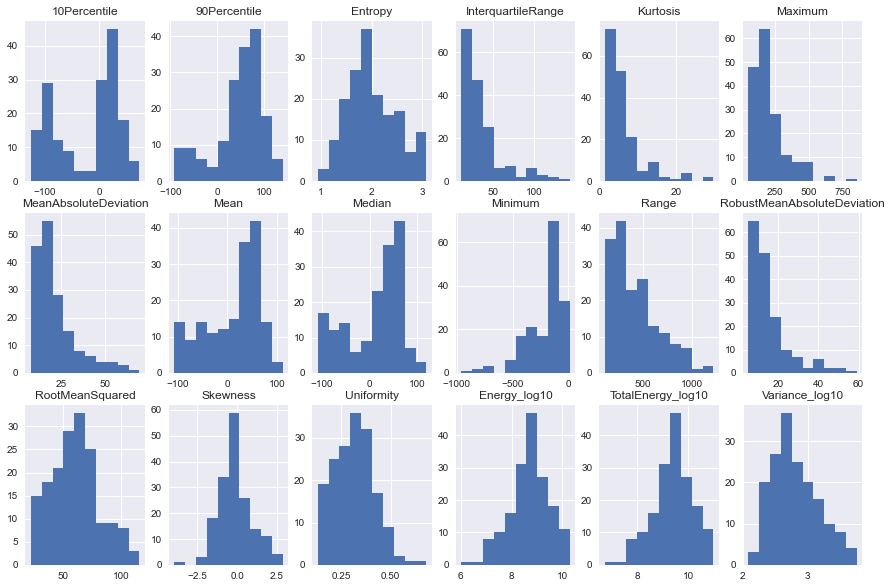

In [5]:
f,a = plt.subplots(3,6, figsize=(15,10))
a = a.ravel()
for n, col in enumerate(df.filter(regex = 'firstorder', axis = 1).columns):
    a[n].hist(df[col])
    a[n].set_title(col.replace('firstorder_',''))

In [11]:
#feature = 'firstorder_Kurtosis'
#df.sort_values(by=feature, ascending=False)[['StudyPatientName', feature, 'firstorder_Maximum']]

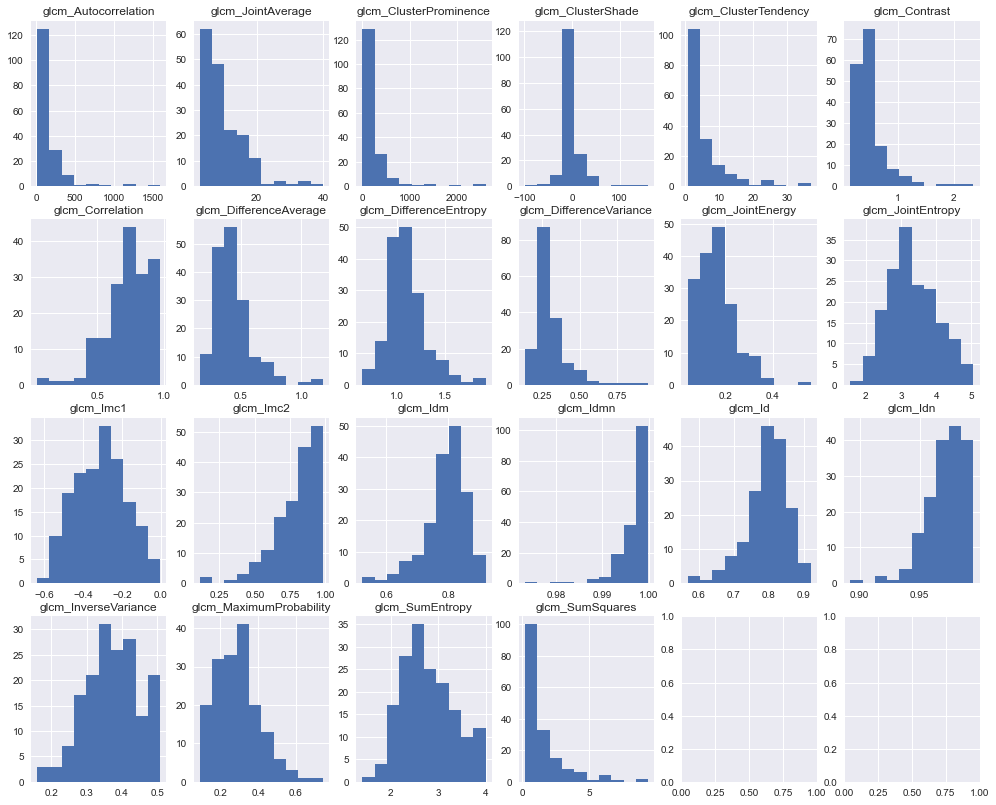

In [7]:
f,a = plt.subplots(4,6, figsize=(17,14))
a = a.ravel()
for n, col in enumerate(df.filter(regex = 'glcm', axis = 1).columns):
    a[n].hist(df[col])
    a[n].set_title(col)

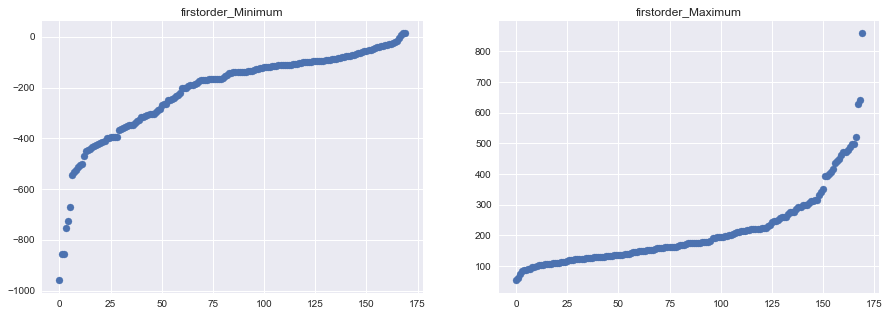

In [8]:
f2,a2 = plt.subplots(1,2, figsize=(15,5))
a2 = a2.ravel()
for n, col in enumerate(df[['firstorder_Minimum', 'firstorder_Maximum']].columns):
    a2[n].scatter(range(df.shape[0]), df[col].sort_values())
    a2[n].set_title(col)

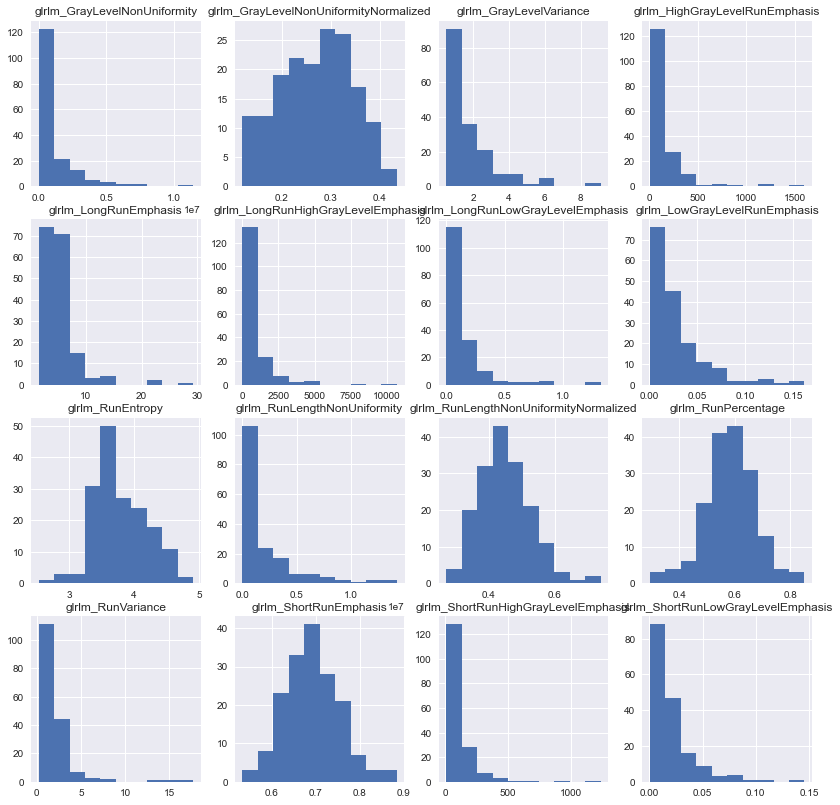

In [9]:
f,a = plt.subplots(4,4, figsize=(14,14))
a = a.ravel()
for n, col in enumerate(df.filter(regex = 'glrlm', axis = 1).columns):
    a[n].hist(df[col])
    a[n].set_title(col)

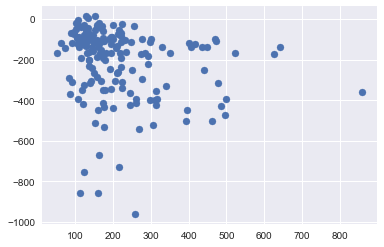

In [10]:
plt.scatter(df.firstorder_Maximum, df.firstorder_Minimum)